Solution 1

In [22]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Part A

In [23]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df.describe())
print(df.head())

X, y = data.data, data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (

Part B and C

In [24]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)

model_poly = SVC(kernel='poly', degree=3)
model_poly.fit(X_train, y_train)
y_pred_poly = model_poly.predict(X_test)
acc_poly = accuracy_score(y_test, y_pred_poly)

model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train, y_train)
y_pred_rbf = model_rbf.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

print("Linear Kernel Results - Linear Kernel:")
print("Classification Report:")
print(classification_report(y_test, y_pred_linear, target_names=data.target_names))

print("Classification Report - Polynomial Kernel:")
print(classification_report(y_test, y_pred_poly, target_names=data.target_names))

print("Classification Report - RBF Kernel:")
print(classification_report(y_test, y_pred_rbf, target_names=data.target_names))

Linear Kernel Results - Linear Kernel:
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Classification Report - Polynomial Kernel:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Classification Report - RBF Kernel:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.0

Part D

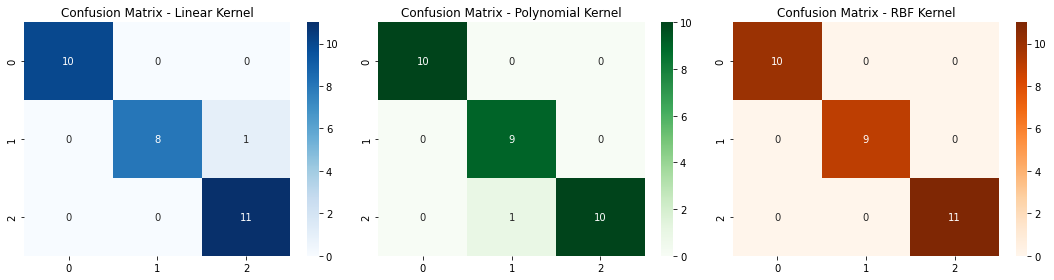

In [25]:
cm_linear = confusion_matrix(y_test, y_pred_linear)
cm_poly = confusion_matrix(y_test, y_pred_poly)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.heatmap(cm_linear, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Linear Kernel")

plt.subplot(1,3,2)
sns.heatmap(cm_poly, annot=True, cmap="Greens", fmt="d")
plt.title("Confusion Matrix - Polynomial Kernel")

plt.subplot(1,3,3)
sns.heatmap(cm_rbf, annot=True, cmap="Oranges", fmt="d")
plt.title("Confusion Matrix - RBF Kernel")

plt.tight_layout()
plt.show()


Part E and F

In [26]:
best_kernel = max(
    {'Linear': acc_linear, 'Polynomial': acc_poly, 'RBF': acc_rbf},
    key=lambda k: {'Linear': acc_linear, 'Polynomial': acc_poly, 'RBF': acc_rbf}[k]
)
print(f"Best performing kernel: {best_kernel}")
print("The best kernel performs well because it provides the highest accuracy and best balance of precision, recall, and F1-score according to the classification report.")

Best performing kernel: RBF
The best kernel performs well because it provides the highest accuracy and best balance of precision, recall, and F1-score according to the classification report.


Solution 2

Part A

In [27]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df.describe())
print(df.head())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

Part B and C

In [28]:
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_unscaled = SVC(kernel='rbf')
model_unscaled.fit(X_train, y_train)
train_acc_unscaled = model_unscaled.score(X_train, y_train)
test_acc_unscaled = model_unscaled.score(X_test, y_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = SVC(kernel='rbf')
model_scaled.fit(X_train_scaled, y_train)
train_acc_scaled = model_scaled.score(X_train_scaled, y_train)
test_acc_scaled = model_scaled.score(X_test_scaled, y_test)

print("Without Scaling:")
print(f"Training Accuracy: {train_acc_unscaled}")
print(f"Testing Accuracy: {test_acc_unscaled}\n")

print("With Scaling:")
print(f"Training Accuracy: {train_acc_scaled}")
print(f"Testing Accuracy: {test_acc_scaled}\n")

print("Feature scaling improves SVM performance by ensuring all features contribute equally, enhancing model accuracy and stability.")

Without Scaling:
Training Accuracy: 0.9142857142857143
Testing Accuracy: 0.9473684210526315

With Scaling:
Training Accuracy: 0.989010989010989
Testing Accuracy: 0.9824561403508771

Feature scaling improves SVM performance by ensuring all features contribute equally, enhancing model accuracy and stability.
